In [ ]:


from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')



In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive/Colab Notebooks/vaccination_tweets.csv'

df = pd.read_csv(path, usecols=['text'])
df.head()

,text
0,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,"Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine @Bor...


In [ ]:
l=df['text'].tolist()
l

['Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF',
 "While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm",
 '#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P',
 "Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4",
 'Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq',
 'Does anyone have any useful advice/guidance for whether the COVID vaccine is safe whilst breastfeeding?… https://t.co/EifsyQoeKN',
 'it is a bit sad to claim the fame for success of #vaccination on patriotic competition between USA, Canada, UK and… https://t.co/IfMrAyGyTP',
 'There have not been many bright days in 2020

In [ ]:
dk = pd.read_csv(path)
dk.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [ ]:
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)

    return text


df['text'] = df['text'].apply(cleanTxt)
df.head()

,text
0,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...
2,coronavirus SputnikV AstraZeneca PfizerBioNTec...
3,"Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine wh...


In [ ]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create function to retrieve polarity


def getPolarity(text):
    return TextBlob(text).sentiment.polarity


# retrieve subjectivity
df['Subjectivity'] = df['text'].apply(getSubjectivity)

#retrieve polarity
df['Polarity'] = df['text'].apply(getPolarity)

df.head()

,text,Subjectivity,Polarity
0,Same folks said daikon paste could treat a cyt...,0.125000,0.00
1,While the world has been on the wrong side of ...,0.900000,-0.50
2,coronavirus SputnikV AstraZeneca PfizerBioNTec...,0.033333,0.00
3,"Facts are immutable, Senator, even when you're...",0.550000,-0.05
4,Explain to me again why we need a vaccine wh...,0.000000,0.00


In [ ]:
#Create a function to compute the negative, neutral, and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score > 0:
    return 'Positive'
  else:
    return 'Neutral'


df['Analysis'] = df['Polarity'].apply(getAnalysis)

#show dataframe
df

,text,Subjectivity,Polarity,Analysis
0,Same folks said daikon paste could treat a cyt...,0.125000,0.000,Neutral
1,While the world has been on the wrong side of ...,0.900000,-0.500,Negative
2,coronavirus SputnikV AstraZeneca PfizerBioNTec...,0.033333,0.000,Neutral
3,"Facts are immutable, Senator, even when you're...",0.550000,-0.050,Negative
4,Explain to me again why we need a vaccine wh...,0.000000,0.000,Neutral
...,...,...,...,...
8077,"Off for my second vaccine, then work. 👋💉\nCure...",0.000000,0.000,Neutral
8078,“When” appears to be a million-dollar question...,0.000000,0.000,Neutral
8079,Second PfizerBioNTech vaccine shot done! Thank...,0.100000,0.125,Positive
8080,Second PfizerBioNTech vaccine is officially in...,0.000000,0.000,Neutral


<function matplotlib.pyplot.show(*args, **kw)>

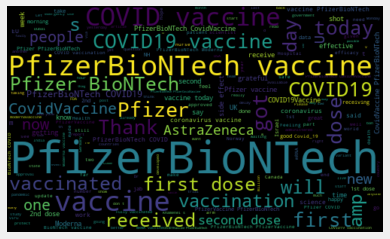

In [ ]:


#Plot the word cloud
allWords = ' '.join([twts for twts in df['text']])
wordCloud = WordCloud(width=500, height=300, random_state=21,
                      max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show



In [ ]:
#Print all the positive tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Positive'):
    print(str(j)+') '+sortedDF['text'][i])
    print()
    j = j+1

Streaming output truncated to the last 5000 lines.

1563) A ‘healthy’ doctor died two weeks after getting a COVID-19 vaccine; CDC is investigating why. Vaccine… 

1564) Day 21 post covid19 vaccination

My 2nd jab due today has been cancelled &amp; postponed🙄

👍🏼All good, as a result, a… 

1565) Have the new jab Hallelujah

PfizerBioNTech
Pfizer


1566) Being a citizen of most beautiful city of the world kanpur, I have one very serious question:
Guru vaccine lagane k… 

1567) Norway has launched a detailed investigation after 23 elderly patients died after taking the Pfizer-BioNTech mRNA… 

1568) 🦠💉More than 80% of the elderly population in Israel got the first shot💉🦠
COVID19 Covidioten covid Covid_19… 

1569) Shot 1 in the 📚! (I think I am legally obligated to post a pic, otherwise it won’t work 🤨) CovidVaccine… 

1570) A global CoronavirusVaccine rollout suffered a major blow Friday as Pfizer said it would delay shipments of the j… 

1571) Friday night fill-in for  includes a HUGE ind

In [ ]:


#Print all the negative tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Negative'):
    print(str(j)+') '+sortedDF['text'][i])
    print()
    j = j+1



1) While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… 

2) Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… 

3) it is a bit sad to claim the fame for success of vaccination on patriotic competition between USA, Canada, UK and… 

4) . will rake in billions from its expensive CovidVaccine but  refuses to cut the price for lowe… 

5) The trump administration failed to deliver on vaccine promises, *shocker* COVIDIOTS coronavirus CovidVaccine… 

6) Wear a mask, wash your hands, and remain socially distant when possible. stayhome StayAtHome StayAtHomeSaveLives… 

7)   Please don’t spread fake news! There is no evidence that these cases are linked to the… 

8) All respect to due process but why not give approval now instead of the 29th of December. Surely multiple other cou… 

9)    check out table 23 of this and other tables too because it took the penny a w…

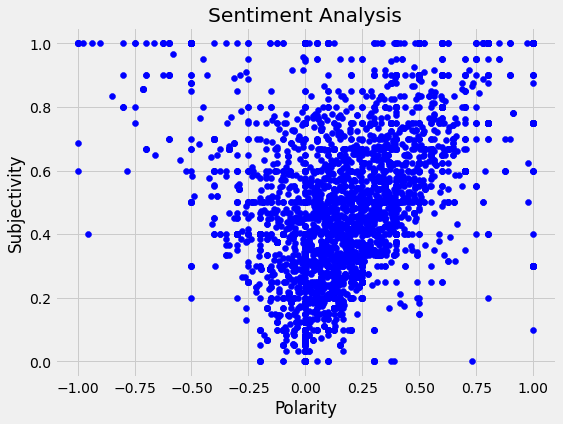

In [ ]:


#plot the polarity and subjectivity
plt.figure(figsize=(8, 6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()



In [ ]:


#get the percentage of Positive Tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['text']

round((ptweets.shape[0] / df.shape[0])*100, 1)



44.0

In [ ]:


#get the percentage of negative Tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['text']

round((ntweets.shape[0] / df.shape[0])*100, 1)



10.3

In [ ]:


#get the percentage of neutral Tweets
neuttweets = df[df.Analysis == 'Neutral']
neuttweets = neuttweets['text']

round((neuttweets.shape[0] / df.shape[0])*100, 1)



45.7

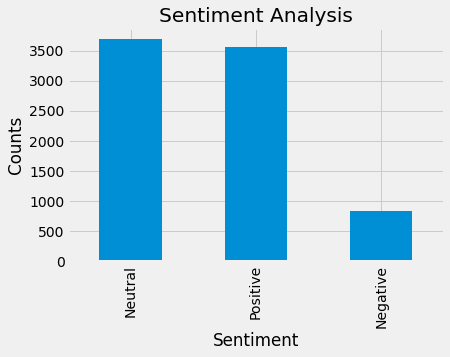

In [ ]:
#show the value counts
df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


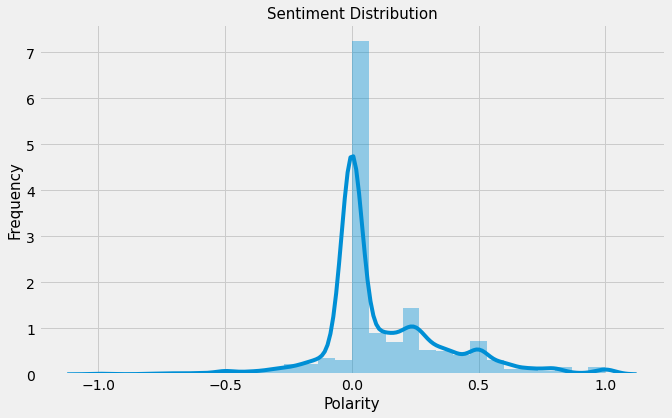

In [ ]:


# sentiment distribution
plt.figure(figsize=(10, 6))
sns.distplot(df['Polarity'], bins=30)
plt.title('Sentiment Distribution', size=15)
plt.xlabel('Polarity', size=15)
plt.ylabel('Frequency', size=15)
plt.show()



In [ ]:
Neutral = len(df[df['Analysis']=='Neutral'])
Negative = len(df[df['Analysis']=='Negative'])
Positive = len(df[df['Analysis']=='Positive'])
labels = ['Negative','Positive','Neutral']
values = [Negative,Positive,Neutral]
#====
import plotly.graph_objects as go
colors = ['darkred','green', 'darkblue' ]

fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,textposition='inside',
                  marker=dict(colors=colors, line=dict(color='black', width=1)))
fig.show()

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

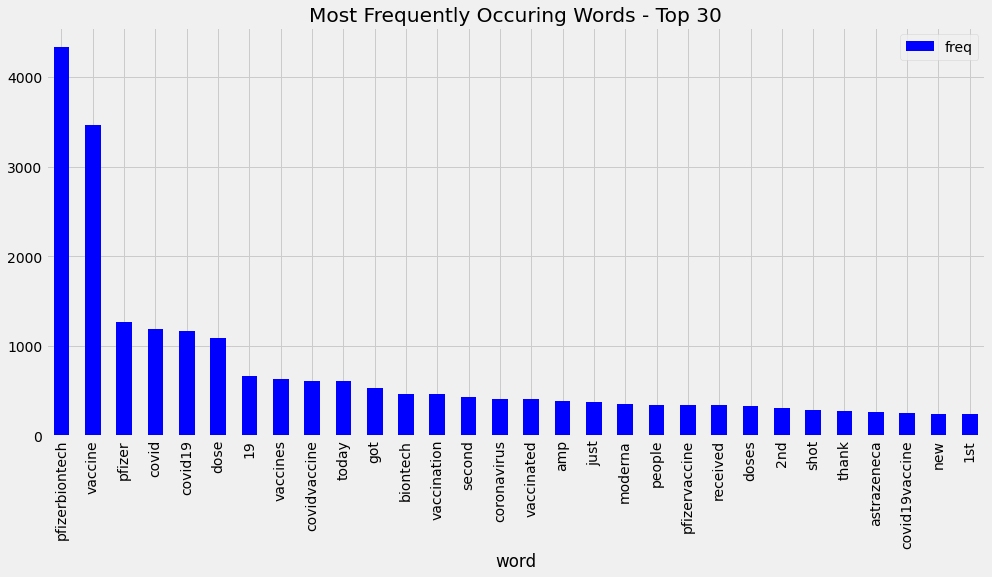

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.text)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
 

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
df['Clean_Tweets']= df['text'].apply(cleanTxt)

In [ ]:
analyser= SentimentIntensityAnalyzer() 

def get_vader_sentiment(sent):
    return analyser.polarity_scores(sent)['compound']

df['sent_vader']= df['Clean_Tweets'].apply(get_vader_sentiment)

sent_pred=[]
for i in range(len(df['sent_vader'])):
    if df['sent_vader'][i]>=0.05:
        sent_pred.append('positive')
    elif df['sent_vader'][i]<=-0.05:
        sent_pred.append('negative')
    else:
        sent_pred.append('neutral')  

df['sent_pred']= sent_pred

In [ ]:
def get_textblob_sentiment(sent):
    return TextBlob(sent).sentiment.polarity


df['sent_TextBlob']= df['Clean_Tweets'].apply(get_textblob_sentiment)

sent_pred=[]
for i in range(len(df['sent_TextBlob'])):
    if df['sent_TextBlob'][i]>=0.05:
        sent_pred.append('positive')
    elif df['sent_TextBlob'][i]<=-0.05:
        sent_pred.append('negative')
    else:
        sent_pred.append('neutral')  

df['sent_predTextBlob']= sent_pred

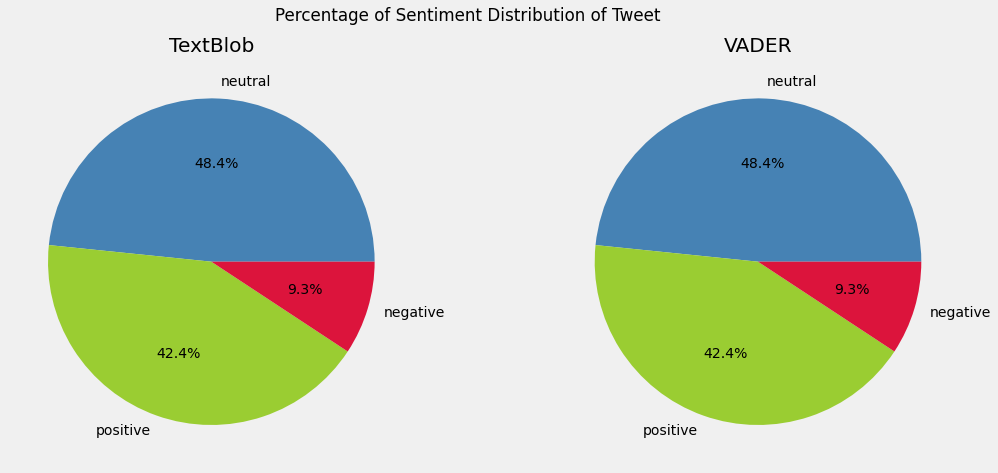

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7), sharey=True)
fig.suptitle('Percentage of Sentiment Distribution of Tweet')

# TextBlob
perc = pd.DataFrame((df['sent_predTextBlob'].value_counts()/len(df))*100)
perc.reset_index(inplace=True)
perc.columns = ['Sentiment','Percentage']
axes[0].pie(perc['Percentage'],
        labels=perc['Sentiment'],
        autopct='%1.1f%%',
        colors=['steelblue','yellowgreen','crimson'])
axes[0].set_title("TextBlob")

# VADER
per = pd.DataFrame((df['sent_pred'].value_counts()/len(df))*100)
per.reset_index(inplace=True)
per.columns = ['Sentiment','Percentage']
axes[1].pie(perc['Percentage'],
        labels=per['Sentiment'],
        autopct='%1.1f%%',
        colors=['steelblue','yellowgreen','crimson'])
axes[1].set_title("VADER")
fig.show()

In [ ]:
pip install vaderSentiment


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 7.5 MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
sentiment = SentimentIntensityAnalyzer()

In [ ]:
def getPolaritys(text):
    return sentiment.polarity_scores(text)

In [ ]:
df['Polaritys'] = df['text'].apply(get_vader_sentiment)
df['Analysis vader'] = df['Polaritys'].apply(getAnalysis)

#show dataframe
df

,text,Subjectivity,Polarity,Analysis,Clean_Tweets,sent_vader,sent_pred,sent_TextBlob,sent_predTextBlob,Polaritys,Analysis vader
0,Same folks said daikon paste could treat a cyt...,0.125000,0.000,Neutral,Same folks said daikon paste could treat a cyt...,0.4019,positive,0.000,neutral,0.4019,Positive
1,While the world has been on the wrong side of ...,0.900000,-0.500,Negative,While the world has been on the wrong side of ...,-0.1027,negative,-0.500,negative,-0.1027,Negative
2,coronavirus SputnikV AstraZeneca PfizerBioNTec...,0.033333,0.000,Neutral,coronavirus SputnikV AstraZeneca PfizerBioNTec...,0.2500,positive,0.000,neutral,0.2500,Positive
3,"Facts are immutable, Senator, even when you're...",0.550000,-0.050,Negative,"Facts are immutable, Senator, even when you're...",0.0000,neutral,-0.050,negative,0.0000,Neutral
4,Explain to me again why we need a vaccine wh...,0.000000,0.000,Neutral,Explain to me again why we need a vaccine wh...,0.0000,neutral,0.000,neutral,0.0000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...
8077,"Off for my second vaccine, then work. 👋💉\nCure...",0.000000,0.000,Neutral,"Off for my second vaccine, then work. 👋💉\nCure...",0.0000,neutral,0.000,neutral,0.0000,Neutral
8078,“When” appears to be a million-dollar question...,0.000000,0.000,Neutral,“When” appears to be a million-dollar question...,0.0000,neutral,0.000,neutral,0.0000,Neutral
8079,Second PfizerBioNTech vaccine shot done! Thank...,0.100000,0.125,Positive,Second PfizerBioNTech vaccine shot done! Thank...,0.5399,positive,0.125,positive,0.5399,Positive
8080,Second PfizerBioNTech vaccine is officially in...,0.000000,0.000,Neutral,Second PfizerBioNTech vaccine is officially in...,0.4738,positive,0.000,neutral,0.4738,Positive


In [ ]:
eutral = len(df[df['Analysis vader']=='Neutral'])
Negative = len(df[df['Analysis vader']=='Negative'])
Positive = len(df[df['Analysis vader']=='Positive'])
labels = ['Negative','Positive','Neutral']
values = [Negative,Positive,Neutral]
#====
import plotly.graph_objects as go
colors = ['darkred','green', 'darkblue' ]

fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,textposition='inside',
                  marker=dict(colors=colors, line=dict(color='black', width=1)))
fig.show()

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 7.9 MB/s 
     |████████████████████████████████| 182 kB 52.1 MB/s 
     |████████████████████████████████| 7.6 MB 55.2 MB/s 


In [ ]:
from transformers import pipeline

In [ ]:
sentiment_analysis = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
import pickle
with open('model2_pkl', 'wb') as files:
    pickle.dump(sentiment_analysis, files)

In [ ]:
with open('model2_pkl' , 'rb') as f:
    lr = pickle.load(f)

In [ ]:
addpol=[]
k=df['text'].tolist()
for o in df['text']:
  g= lr.predict(o)
  
  addpol.append(g)
df['text3']=addpol

In [ ]:
df

,text,Subjectivity,Polarity,Analysis,text3
0,Same folks said daikon paste could treat a cyt...,0.125000,0.000,Neutral,"[{'label': 'NEGATIVE', 'score': 0.994333505630..."
1,While the world has been on the wrong side of ...,0.900000,-0.500,Negative,"[{'label': 'POSITIVE', 'score': 0.990378379821..."
2,coronavirus SputnikV AstraZeneca PfizerBioNTec...,0.033333,0.000,Neutral,"[{'label': 'NEGATIVE', 'score': 0.995032548904..."
3,"Facts are immutable, Senator, even when you're...",0.550000,-0.050,Negative,"[{'label': 'POSITIVE', 'score': 0.994936704635..."
4,Explain to me again why we need a vaccine wh...,0.000000,0.000,Neutral,"[{'label': 'NEGATIVE', 'score': 0.996830999851..."
...,...,...,...,...,...
8077,"Off for my second vaccine, then work. 👋💉\nCure...",0.000000,0.000,Neutral,"[{'label': 'NEGATIVE', 'score': 0.996016323566..."
8078,“When” appears to be a million-dollar question...,0.000000,0.000,Neutral,"[{'label': 'NEGATIVE', 'score': 0.997557997703..."
8079,Second PfizerBioNTech vaccine shot done! Thank...,0.100000,0.125,Positive,"[{'label': 'POSITIVE', 'score': 0.761904597282..."
8080,Second PfizerBioNTech vaccine is officially in...,0.000000,0.000,Neutral,"[{'label': 'POSITIVE', 'score': 0.998877227306..."


In [ ]:
l=df['text'].tolist()
l

['Same folks said daikon paste could treat a cytokine storm PfizerBioNTech ',
 "While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… ",
 'coronavirus SputnikV AstraZeneca PfizerBioNTech Moderna Covid_19 Russian vaccine is created to last 2-4 years… ',
 "Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… ",
 'Explain to me again why we need a vaccine   whereareallthesickpeople PfizerBioNTech… ',
 'Does anyone have any useful advice/guidance for whether the COVID vaccine is safe whilst breastfeeding?… ',
 'it is a bit sad to claim the fame for success of vaccination on patriotic competition between USA, Canada, UK and… ',
 'There have not been many bright days in 2020 but here are some of the best \n1. BidenHarris winning Election2020… ',
 'Covid vaccine; You getting it?\n\n CovidVaccine covid19 PfizerBioNTech Moderna',
 'CovidVaccine \n\nStates will start get

In [ ]:
k=sentiment_analysis(l)

In [ ]:
df['Polaritys'] = df['text'].apply(sentiment_analysis)


In [ ]:
df['Polarityss']=df['Polaritys'].str[0].str['label']

In [ ]:
df

,text,Subjectivity,Polarity,Analysis,Polaritys,Polarityss
0,Same folks said daikon paste could treat a cyt...,0.125000,0.000,Neutral,"[{'label': 'NEGATIVE', 'score': 0.994333505630...",NEGATIVE
1,While the world has been on the wrong side of ...,0.900000,-0.500,Negative,"[{'label': 'POSITIVE', 'score': 0.990378379821...",POSITIVE
2,coronavirus SputnikV AstraZeneca PfizerBioNTec...,0.033333,0.000,Neutral,"[{'label': 'NEGATIVE', 'score': 0.995032548904...",NEGATIVE
3,"Facts are immutable, Senator, even when you're...",0.550000,-0.050,Negative,"[{'label': 'POSITIVE', 'score': 0.994936704635...",POSITIVE
4,Explain to me again why we need a vaccine wh...,0.000000,0.000,Neutral,"[{'label': 'NEGATIVE', 'score': 0.996830999851...",NEGATIVE
...,...,...,...,...,...,...
8077,"Off for my second vaccine, then work. 👋💉\nCure...",0.000000,0.000,Neutral,"[{'label': 'NEGATIVE', 'score': 0.996016323566...",NEGATIVE
8078,“When” appears to be a million-dollar question...,0.000000,0.000,Neutral,"[{'label': 'NEGATIVE', 'score': 0.997557997703...",NEGATIVE
8079,Second PfizerBioNTech vaccine shot done! Thank...,0.100000,0.125,Positive,"[{'label': 'POSITIVE', 'score': 0.761904597282...",POSITIVE
8080,Second PfizerBioNTech vaccine is officially in...,0.000000,0.000,Neutral,"[{'label': 'POSITIVE', 'score': 0.998877227306...",POSITIVE


In [ ]:
df['Analysissss'] = df['Polarityss'].apply(getAnalysis)
df

,text,Subjectivity,Polarity,Analysis,Polaritys,Polarityss,Analysissss
0,Same folks said daikon paste could treat a cyt...,0.125000,0.000,Neutral,"[{'label': 'NEGATIVE', 'score': 0.994333505630...",0.994334,Positive
1,While the world has been on the wrong side of ...,0.900000,-0.500,Negative,"[{'label': 'POSITIVE', 'score': 0.990378379821...",0.990378,Positive
2,coronavirus SputnikV AstraZeneca PfizerBioNTec...,0.033333,0.000,Neutral,"[{'label': 'NEGATIVE', 'score': 0.995032548904...",0.995033,Positive
3,"Facts are immutable, Senator, even when you're...",0.550000,-0.050,Negative,"[{'label': 'POSITIVE', 'score': 0.994936704635...",0.994937,Positive
4,Explain to me again why we need a vaccine wh...,0.000000,0.000,Neutral,"[{'label': 'NEGATIVE', 'score': 0.996830999851...",0.996831,Positive
...,...,...,...,...,...,...,...
8077,"Off for my second vaccine, then work. 👋💉\nCure...",0.000000,0.000,Neutral,"[{'label': 'NEGATIVE', 'score': 0.996016323566...",0.996016,Positive
8078,“When” appears to be a million-dollar question...,0.000000,0.000,Neutral,"[{'label': 'NEGATIVE', 'score': 0.997557997703...",0.997558,Positive
8079,Second PfizerBioNTech vaccine shot done! Thank...,0.100000,0.125,Positive,"[{'label': 'POSITIVE', 'score': 0.761904597282...",0.761905,Positive
8080,Second PfizerBioNTech vaccine is officially in...,0.000000,0.000,Neutral,"[{'label': 'POSITIVE', 'score': 0.998877227306...",0.998877,Positive


In [ ]:
Neutral = len(df[df['Polarityss']=='NEUTRAL'])
Negative = len(df[df['Polarityss']=='NEGATIVE'])
Positive = len(df[df['Polarityss']=='POSITIVE'])
labels = ['Negative','Positive','Neutral']
values = [Negative,Positive,Neutral]
#====
import plotly.graph_objects as go
colors = ['darkred','green', 'darkblue' ]

fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,textposition='inside',
                  marker=dict(colors=colors, line=dict(color='black', width=1)))
fig.show()